In [22]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier ,export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import pandas as pd
from matplotlib import pyplot as plt

In [23]:
# prepare the data
df = pd.read_csv("../task_data.csv")
df = df.replace(',', '.', regex=True)
df = df.dropna()

In [24]:
df.head()
df.shape

(37, 14)

In [25]:
# assign X and y with proper data
X = df.drop(columns=['ID', 'Cardiomegaly'])
y = df['Cardiomegaly']

In [26]:
# preprocess
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2)

In [27]:
# create RFC
rf = RandomForestClassifier()

In [28]:
# fit the data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# test predictions (75% accuracy for this run here)
y_pred = rf.predict(X_test)
print(y_pred)

[1 1 0 1 1 1 1 1]


In [30]:
rf.score(X_test, y_test)

0.75

In [31]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.71      1.00      0.83         5

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



In [39]:
rf2 = RandomForestClassifier(n_estimators = 1000,
                             criterion = 'entropy', 
                             min_samples_split = 5,
                             max_depth = 14, 
                             random_state = 42)

In [40]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=5,
                       n_estimators=1000, random_state=42)

In [41]:
rf2.score(X_test, y_test)

0.75

In [42]:
y_pred2 = rf2.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.71      1.00      0.83         5

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



In [44]:
import seaborn as sns

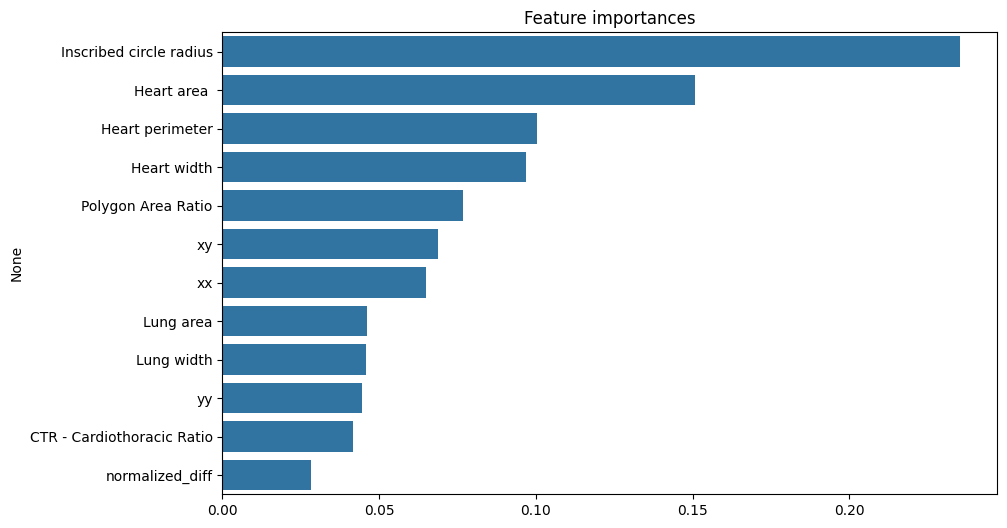

In [45]:
importances = rf2.feature_importances_
features = X.columns

indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature importances")
plt.show()

In [54]:
print(rf2.predict_proba(X_train[:10]))
print(y_train[:10])
print(rf2.predict(X_test))

[[0.01167024 0.98832976]
 [0.02222778 0.97777222]
 [0.00852024 0.99147976]
 [0.70866475 0.29133525]
 [0.67249968 0.32750032]
 [0.01209286 0.98790714]
 [0.00620714 0.99379286]
 [0.03183095 0.96816905]
 [0.05359087 0.94640913]
 [0.056775   0.943225  ]]
24    1
10    1
28    1
8     0
12    0
5     1
26    1
33    1
36    1
25    1
Name: Cardiomegaly, dtype: int64
[1 1 0 1 1 1 1 1]
